In [68]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 20})

## 1 candle

30459


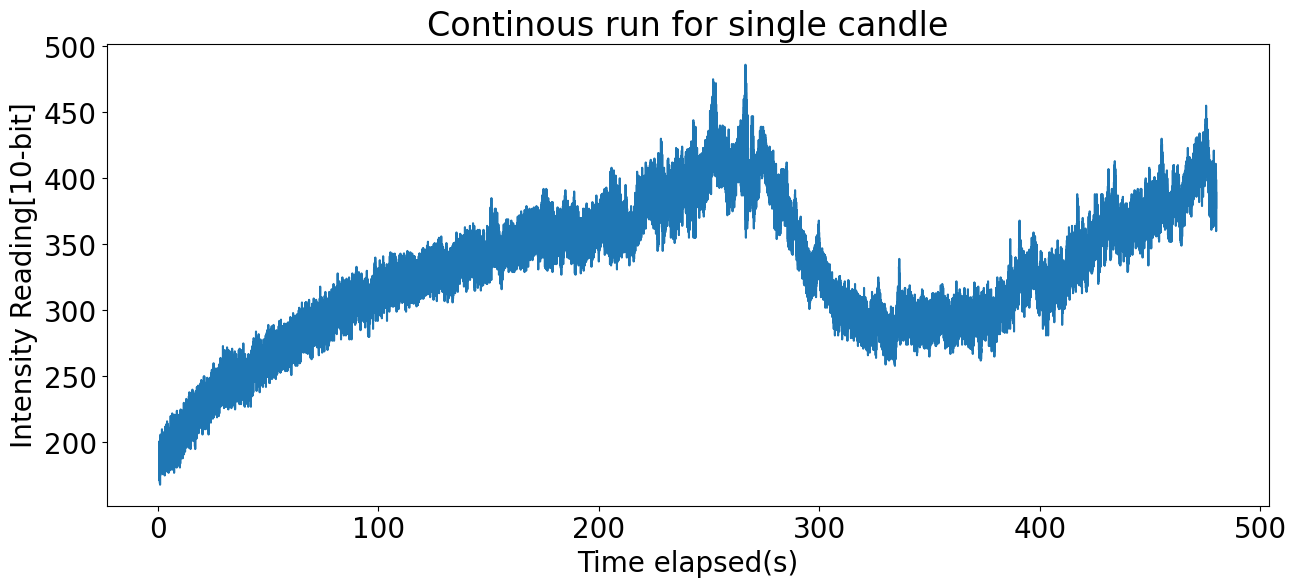

In [69]:
datapath = "./data/1candle_10bit_cts_363_50_1.csv"
timepath = "./data/1candle_10bit_cts_363_50_time1.csv"

#Run 1 was cleanest looking data
data = np.genfromtxt(datapath, delimiter=",")
time = np.genfromtxt(timepath, delimiter=",")
print(len(time))


#Rebinning time/data to see if it's clearer(without error estimates)
factor = 30
time_rebinned = time[0::factor]
data_rebinned = data[0::factor]

plt.figure(figsize=(15, 6))
plt.plot(time,data, label = 'Regular')
#plt.plot(time_rebinned,data_rebinned, label = 'Rebinned')
plt.title('Continous run for single candle')
plt.xlabel('Time elapsed(s)')
plt.ylabel('Intensity Reading[10-bit]')
#plt.legend(fontsize = 20)
plt.show()

## 2 candles

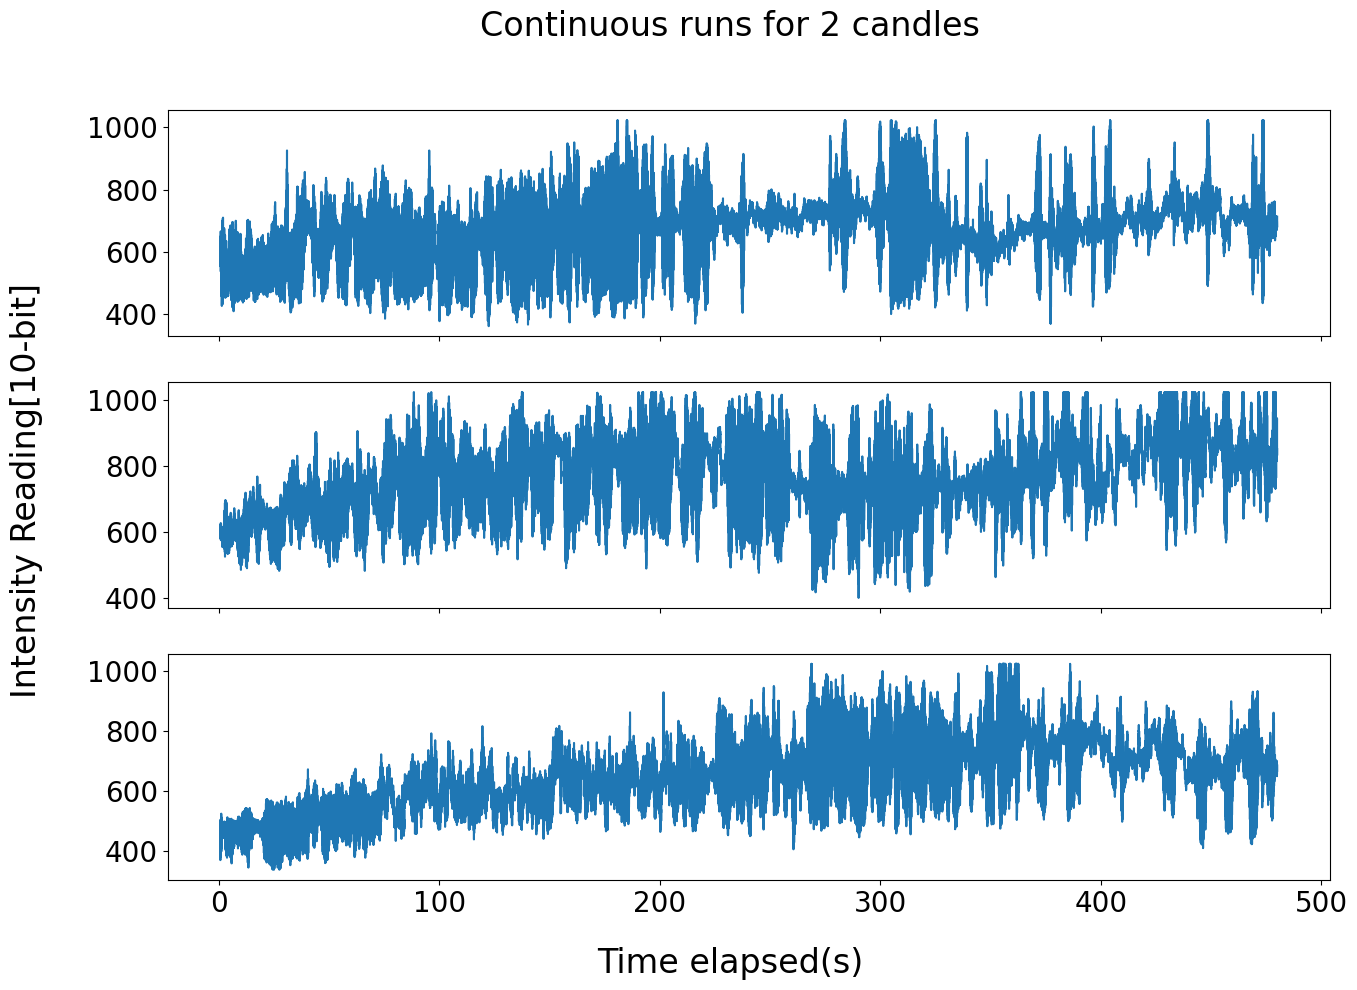

In [70]:
#Runs 1,2 and 3 are good data
datapath = "./data/2candles_10bit_cts_363_2.csv"
timepath = "./data/2candles_10bit_cts_363_time2.csv"

data = np.genfromtxt(datapath, delimiter=",")
time = np.genfromtxt(timepath, delimiter=",")

datapath2 = "./data/2candles_10bit_cts_363_50_1.csv"
timepath2 = "./data/2candles_10bit_cts_363_50_time1.csv"

data2 = np.genfromtxt(datapath2, delimiter=",")
time2 = np.genfromtxt(timepath2, delimiter=",")

datapath3 = "./data/2candles_10bit_cts_363_3.csv"
timepath3 = "./data/2candles_10bit_cts_363_time3.csv"

data3 = np.genfromtxt(datapath3, delimiter=",")
time3 = np.genfromtxt(timepath3, delimiter=",")

fig, axs = plt.subplots(3, sharex=True, figsize=(15,10))
fig.suptitle('Continuous runs for 2 candles')
fig.supxlabel('Time elapsed(s)')
fig.supylabel('Intensity Reading[10-bit]')
axs[0].plot(time, data)
axs[1].plot(time2, data2)
axs[2].plot(time3, data3)


#plt.figure(figsize=(15, 6))
#plt.plot(time,data)
#plt.xlabel('Time elapsed(s)')
#plt.ylabel('Intensity Reading[10-bit]')

#plt.figure(figsize=(15, 6))
#plt.plot(time2,data2)
#plt.xlabel('Time elapsed(s)')
#plt.ylabel('Intensity Reading[10-bit]')



plt.show()

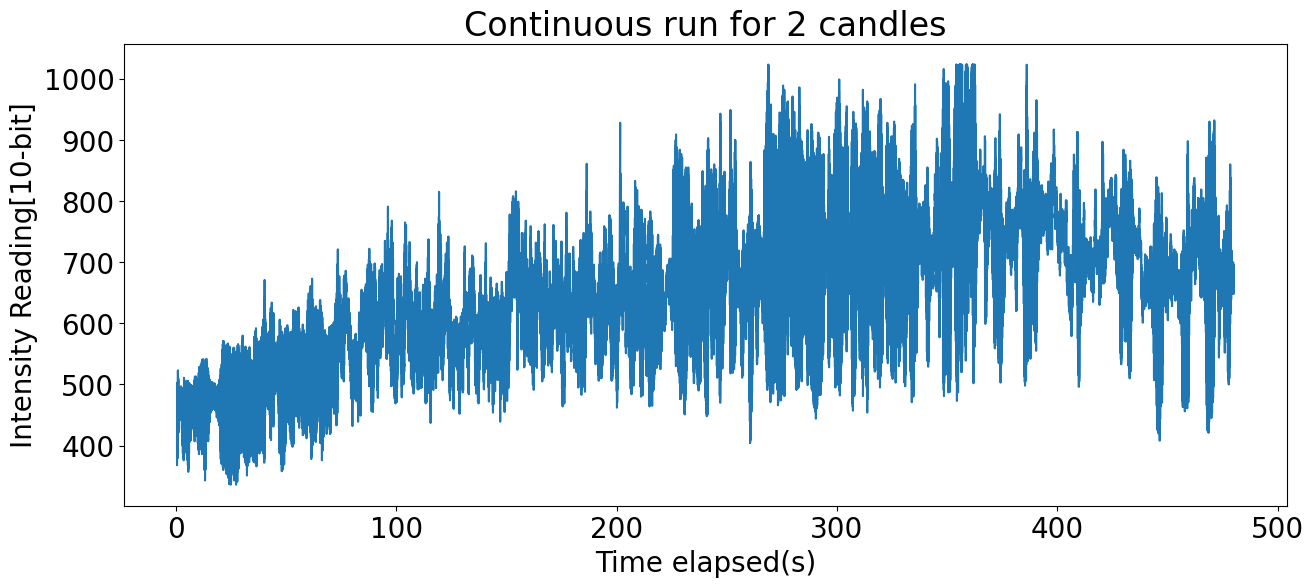

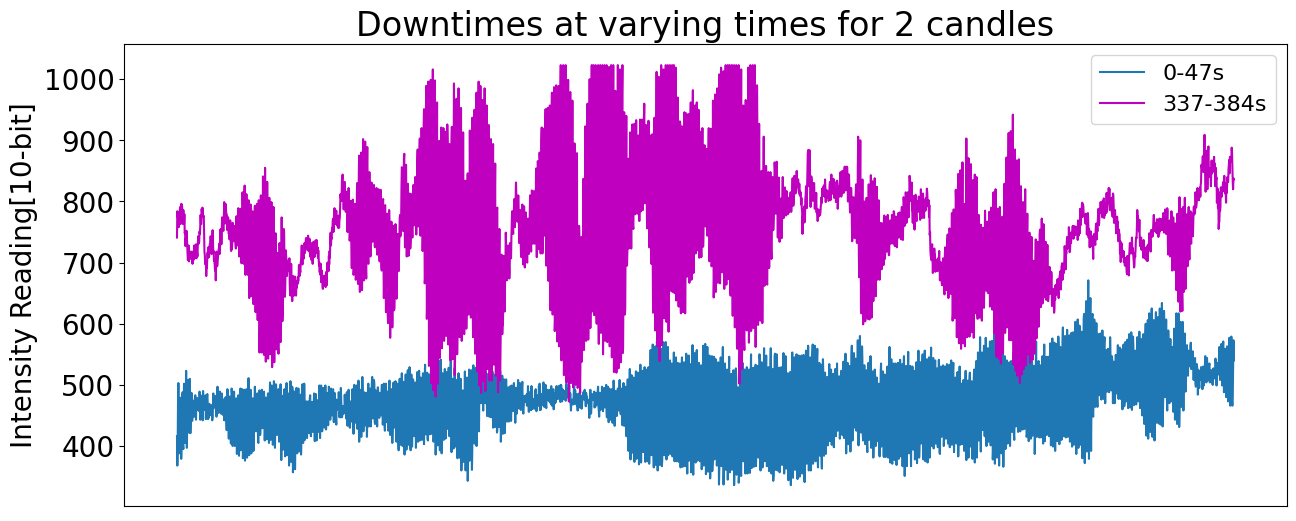

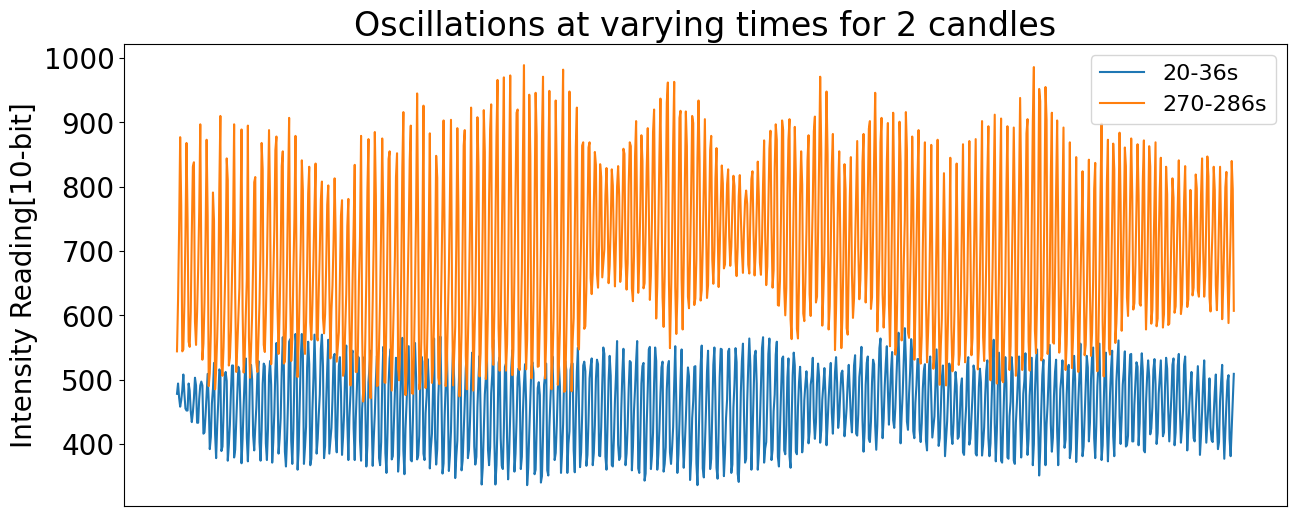

In [71]:
# Use Run 3 for clearest data
datapath = "./data/2candles_10bit_cts_363_3.csv"
timepath = "./data/2candles_10bit_cts_363_time3.csv"

data = np.genfromtxt(datapath, delimiter=",")
time = np.genfromtxt(timepath, delimiter=",")


#Comparison interval for oscillations
time_1 = time[1250:2250] 
data_1 = data[1250:2250]

#Period of large oscillations, starting with downtime of 5s and ending with downtime of 1s
time_2 = time[0:3000]
data_2 = data[0:3000]

#Later comparison interval for oscillations
time_3 = time[17500:18500]
data_3 = data[17500:18500]

#Later data set for comparing downtimes
time_4 = time[21800:24800]
data_4 = data[21800:24800]


#Whole run
plt.figure(figsize=(15, 6))
plt.plot(time,data)
plt.title('Continuous run for 2 candles')
plt.xlabel('Time elapsed(s)')
plt.ylabel('Intensity Reading[10-bit]')


#Downtimes at early vs. later time
plt.figure(figsize=(15, 6))
x = np.linspace(0,3000,3000)
plt.plot(x, data_2, label = '0-47s')
plt.plot(x, data_4, label = '337-384s', color = 'm')
#hide x-axis
ax = plt.gca()
ax.get_xaxis().set_visible(False)
plt.ylabel('Intensity Reading[10-bit]')
plt.title('Downtimes at varying times for 2 candles')
plt.legend(fontsize = 16)


#Data to see accurate downtimes
#plt.figure(figsize=(15, 6))
#plt.plot(time_2, data_2)
#plt.xlabel('Time elapsed(s)')
#plt.ylabel('Intensity Reading[10-bit]')

#plt.figure(figsize=(15, 6))
#plt.plot(time_4, data_4)
#plt.xlabel('Time elapsed(s)')
#plt.ylabel('Intensity Reading[10-bit]')


# 2 sets of oscillations at earlier/later time
plt.figure(figsize=(15, 6))
x = np.linspace(0,1000,1000)
plt.plot(x, data_1, label = '20-36s')
plt.plot(x, data_3, label = '270-286s')
#hide x-axis
ax = plt.gca()
ax.get_xaxis().set_visible(False)
plt.ylabel('Intensity Reading[10-bit]')
plt.title('Oscillations at varying times for 2 candles')
plt.legend(fontsize = 16)


plt.show()

## To do:
### Try to use other runs to see downtime periods between large oscillations
### If possible, try to plot similar looking modes with each other
### Also if possible, try to have multiple plots in one figure showing different oscillation regimes

## Ideas to explore:
### As a whole, what is the underlying trend in the runs?(involving height of detector and possible air loss)
### If I look at a same size interval of oscillations at a later time do they look like they have the same period?- Done
### Explore region with more scattered sets of oscillations ~ (>70s) - DO THIS for 2 and 3

### Keep in mind photodector distance for 3 candles was adjusted so we shouldn't expect same intensity as 2

## Methods:
### Add methods for single, double and triple candle setups, with sample runs, and mention(time base = 50) for cts

## Discussion:
### Sources of error(systematic): air ventilation, box is not fully windproof, etc. etc
### Changes in single candle: height of detector vs. candle, box is not windproof, lacking air
### Discuss 3 runs and trends observed(2 regimes, lack of air, height, etc.)

### For double candle, 2 regimes, one with tight oscillations and almost no downtimes and one with frequent downtimes(oscillations don't last as long) but higher oscillations(because of height of detector) 
### Period is unchanged over time but oscillations are not as long
### Downtime change over time?? Later, it becomes more frequent and lasts longer, more spiky

### Same for triple, but now discuss changes vs double(more frequent oscillations, lasts longer, but loses air quicker, also intensity is lower because of changed photodetector distance)


## Conclusion:
### In future we can do 2/3 sets of candles(and modify the distance between them to see modes), also make box more windproof and conduct in low ventilated room
### Experiment with resistor value(but this is just for scaling), maybe change resolution???
### Also alignment of candles: grouped as triangle vs horizontally aligned
### Detector for each candle, see how each candle separately oscillates

## 3 candles

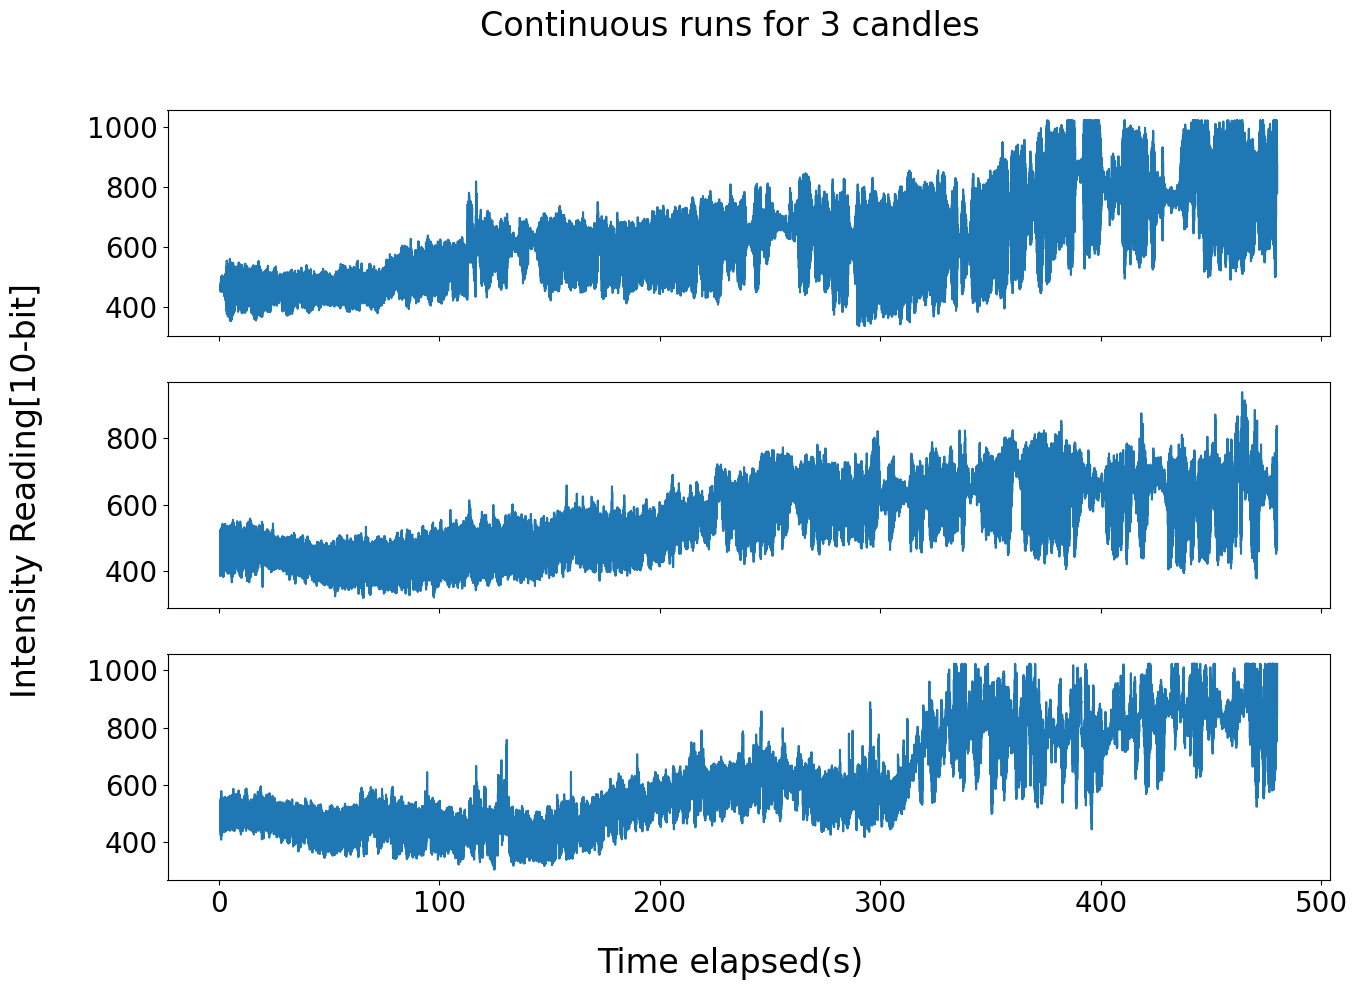

In [72]:
# runs 2,3 and 5 are good data
datapath = "./data/3candles_10bit_cts_363_5.csv"
timepath = "./data/3candles_10bit_cts_363_time5.csv"

data = np.genfromtxt(datapath, delimiter=",")
time = np.genfromtxt(timepath, delimiter=",")

datapath2 = "./data/3candles_10bit_cts_363_2.csv"
timepath2 = "./data/3candles_10bit_cts_363_time2.csv"

data2 = np.genfromtxt(datapath2, delimiter=",")
time2 = np.genfromtxt(timepath2, delimiter=",")

datapath3 = "./data/3candles_10bit_cts_363_3.csv"
timepath3 = "./data/3candles_10bit_cts_363_time3.csv"

data3 = np.genfromtxt(datapath3, delimiter=",")
time3 = np.genfromtxt(timepath3, delimiter=",")

fig, axs = plt.subplots(3, sharex=True, figsize=(15,10))
fig.suptitle('Continuous runs for 3 candles')
fig.supxlabel('Time elapsed(s)')
fig.supylabel('Intensity Reading[10-bit]')
axs[0].plot(time, data)
axs[1].plot(time2, data2)
axs[2].plot(time3, data3)

plt.show()

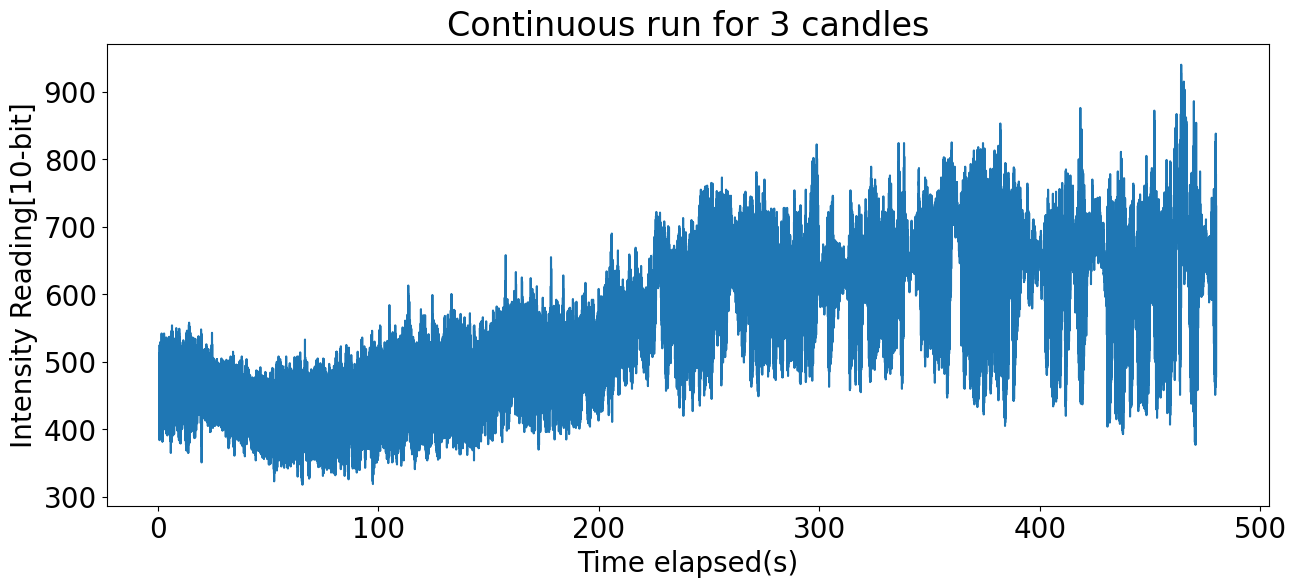

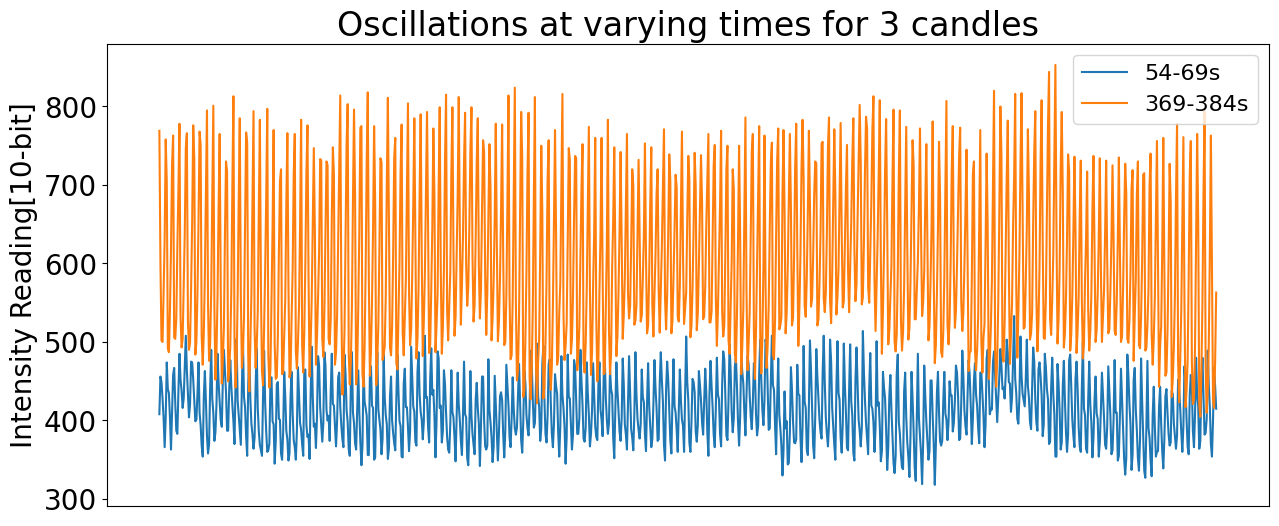

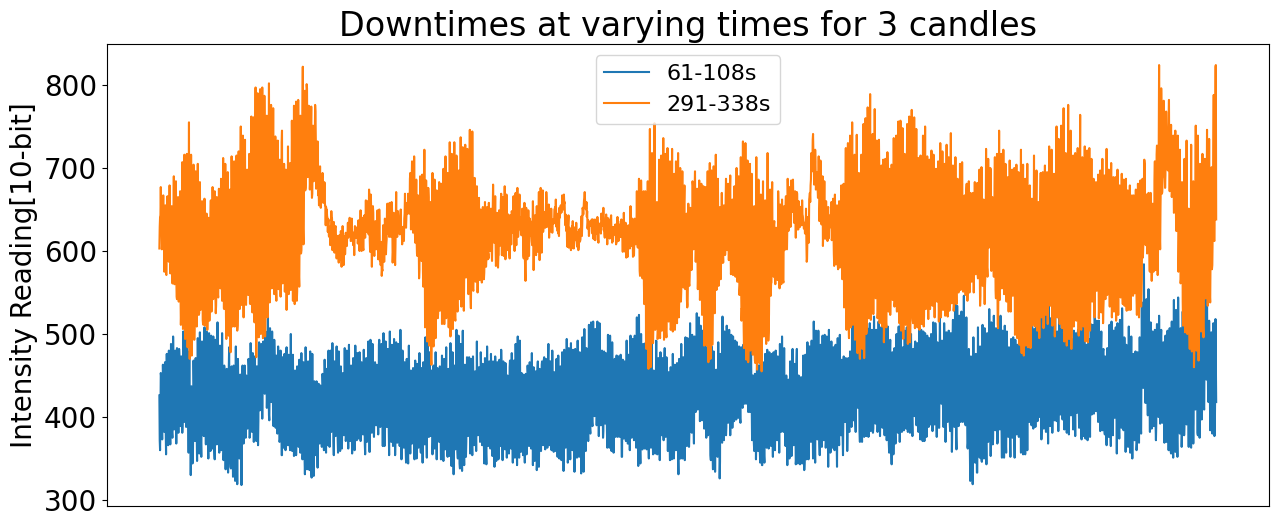

In [73]:
#Run 2 has cleanest data
datapath = "./data/3candles_10bit_cts_363_2.csv"
timepath = "./data/3candles_10bit_cts_363_time2.csv"

data = np.genfromtxt(datapath, delimiter=",")
time = np.genfromtxt(timepath, delimiter=",")


#Comparison interval for oscillations
time_1 = time[3500:4500] 
data_1 = data[3500:4500]

#Later interval for oscillations
time_2 = time[24000:25000]
data_2 = data[24000:25000]

#Downtimes at early interval
time_3 = time[4000:7000]
data_3 = data[4000:7000]

#Later interval for downtimes
time_4 = time[19000:22000]
data_4 = data[19000:22000]



#Whole run
plt.figure(figsize=(15, 6))
plt.plot(time,data)
plt.title('Continuous run for 3 candles')
plt.xlabel('Time elapsed(s)')
plt.ylabel('Intensity Reading[10-bit]')


#Comparing oscillations
plt.figure(figsize=(15, 6))
x = np.linspace(0,1000,1000)
plt.plot(x, data_1, label = '54-69s')
plt.plot(x, data_2, label = '369-384s')
#hide x-axis
ax = plt.gca()
ax.get_xaxis().set_visible(False)
plt.ylabel('Intensity Reading[10-bit]')
plt.title('Oscillations at varying times for 3 candles')
plt.legend(fontsize = 16)


#Comparing downtimes
plt.figure(figsize=(15, 6))
x = np.linspace(0,3000,3000)
plt.plot(x, data_3, label = '61-108s')
plt.plot(x, data_4, label = '291-338s')
#hide x-axis
ax = plt.gca()
ax.get_xaxis().set_visible(False)
plt.ylabel('Intensity Reading[10-bit]')
plt.title('Downtimes at varying times for 3 candles')
plt.legend(fontsize = 16)


plt.show()